# NN solves XOR function

![alt text](pictures/and_or_xor.png  "AND, OR, XOR classification")

Jak je vidět na obrázku, pro řešení XOR musíme mít k dispozici dva klasifikátory. Napíšeme si tedy naši první neuronku. Naše  jednoduchá neuronová síť bude mít dva vstupy, jednu skrytou vrstvu (hidden layer) a jeden výstup.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_csf_heat():
    grain = 0.01
    shape = int(1.0/grain)
    clsfy = np.zeros(shape=(shape, shape))
    
    point_y_plt = 0
    for point_y in np.arange(0., 1., grain):
    
        point_x_plt = 0
        for point_x in np.arange(0., 1., grain):
            #print('y:', point_x_plt, ' x: ', point_y_plt)
            clsfy[point_x_plt, point_y_plt] = \
                sess.run(prediction_output, feed_dict={x: [[point_x, point_y]]})[0][0]
            point_x_plt = point_x_plt + 1
            
        point_y_plt = point_y_plt + 1
        
    plt.imshow(clsfy, origin="lower", cmap='Blues_r', interpolation='nearest', extent=[0, 1, 0, 1])
    plt.show()

O něco lepší funkce pro vykreslení klasifikace než ta v předchozím notebooku.

In [3]:
XOR_X  = [[0,0], [0,1], [1,0], [1,1]]
XOR_Y  = [[0],   [1],   [1],   [0]]

x_test = [[1,1], [0,0], [0,1], [1,0]]

Naše tréningová data. X jsou vstupy, Y je výstup, který chceme neuronku naučit.

In [4]:
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, shape=[None, 2])

with tf.name_scope('target'):
    y = tf.placeholder(tf.float32, shape=[None, 1])

Vstupy jako placeholder 'inputs' a výsledek, který chceme neuronku naučit jako 'target'.

![alt text](pictures/XOR_neuronka_annotated.png "XOR neuronka")

In [5]:
with tf.name_scope("network") as scope:
   
    with tf.name_scope("hidden_layer") as scope:
        W1 = tf.Variable(tf.random_uniform([2,2], -1, 1), name = "W1")
        b1 = tf.Variable([1.0], [.1], name = "b1")
        prediction_hidden = tf.matmul(x, W1) + b1
        activation_function_hidden  = tf.sigmoid(prediction_hidden)
   
    with tf.name_scope("output_layer") as scope:
        W2 = tf.Variable(tf.random_uniform([2,1], -1, 1), name = "W2")
        b2 = tf.Variable([1.0], name = "b2")
        prediction_output = tf.matmul(activation_function_hidden, W2) + b2

Vstupní, abstraktní layer, zastává Tensor 'inputs'. Definuji skrytý laeyer (dva Perceptrony mají vstup v meshi). Výstupní layer sestává z jednoho Perceptronu. Ve scope hidden_layer pak 'activation_function_hidden' použije tradiční sigmoid aktivační funkci, výstup z neuronky většinou žádnou aktivační funkci nepoužívá.

In [6]:
with tf.name_scope("training") as scope:

    with tf.name_scope("cost") as scope:
        cost_function = tf.nn.l2_loss(prediction_output - y)

    with tf.name_scope("optimizer") as scope:
        #train = tf.train.AdamOptimizer().minimize(cost_function)
        train = tf.train.MomentumOptimizer(0.2, 0.8).minimize(cost_function)
        #train = tf.train.GradientDescentOptimizer(0.001).minimize(cost_function)

V tomto jednoduchém příkladu si můžeme vyzkoušet hned několik aktivačních funkcí.

epoch:  0  cost:  3.31584


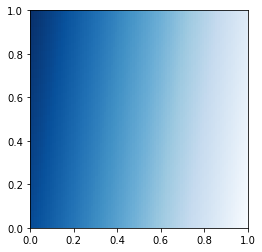

----- final weights and biases ------
W1: 
[[-1.45731294 -4.33358335]
 [-1.46728671 -4.38137484]]
b1: 
[ 1.47336209]
W2: 
[[ 3.14106369]
 [-2.51430988]]
b2: 
[-0.49591458]

----- test ------
1  xor  1  =  [[ 0.]]
0  xor  0  =  [[ 0.]]
0  xor  1  =  [[ 1.]]
1  xor  0  =  [[ 1.]]


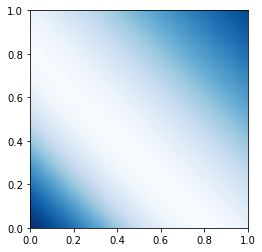

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter("./tensorboard_example", sess.graph)

    cost_function_result = 1000.0
    training_epoch = -1

    while cost_function_result > 0.01:
        training_epoch += 1
        _, cost_function_result = sess.run([train, cost_function], feed_dict={x: XOR_X, y: XOR_Y})  
        if training_epoch % 10000 == 0:
            print('epoch: ', training_epoch, ' cost: ', cost_function_result)
            show_csf_heat()
            
    print('----- final weights and biases ------')
    print('W1: ')
    print(sess.run(W1))
    print('b1: ')
    print(sess.run(b1))
    print('W2: ')
    print(sess.run(W2))
    print('b2: ')
    print(sess.run(b2))
    print()
    print('----- test ------')

    for test in x_test:
        print(test[0], ' xor ', test[1], ' = ',
            np.abs(np.round(sess.run(prediction_output, feed_dict={x: [test]}))))

    show_csf_heat()

Výsledek logické operace XOR na osách grafu [0, 0] a [1, 1]. Bílá plocha == 1, modrá plocha == 0.